In [1]:
# import the pandas library
import pandas as pd

In [14]:
# read in csv file as a pandas dataframe
import os

superstore = pd.read_csv("../data/superstore.csv", encoding='ISO-8859-1') 


In [ ]:
# preview the dataset

superstore.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [26]:
# Check data types and missing values to guide cleaning and transformation
superstore.info()
superstore.isnull().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [ ]:
# Generate summary statistics for numeric columns
superstore.describe()  # Numeric only

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
# Generate summary statistics for categorical columns
superstore.describe(include='object')  # Categorical only


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,1334,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,9/5/2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,35,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


In [32]:
# Assess categorical column diversity and potential grouping needs
superstore.nunique().sort_values(ascending=False)


Row ID           9994
Profit           7287
Sales            5825
Order ID         5009
Product ID       1862
Product Name     1850
Ship Date        1334
Order Date       1237
Customer ID       793
Customer Name     793
Postal Code       631
City              531
State              49
Sub-Category       17
Quantity           14
Discount           12
Ship Mode           4
Region              4
Segment             3
Category            3
Country             1
dtype: int64

In [30]:
# Frequency analysis for business dimensions
for col in ['Category', 'Sub-Category', 'Region', 'Segment']:
    print(f"\nValue Counts for {col}:\n")
    print(superstore[col].value_counts())


Value Counts for Category:

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

Value Counts for Sub-Category:

Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

Value Counts for Region:

Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

Value Counts for Segment:

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64


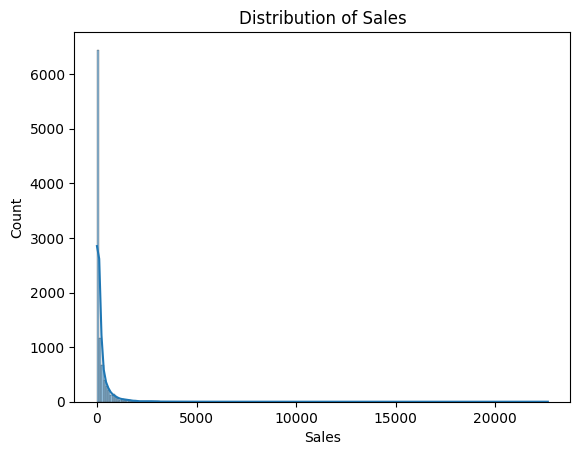

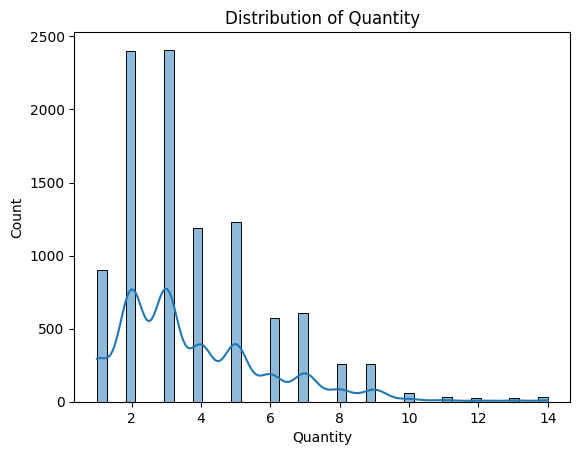

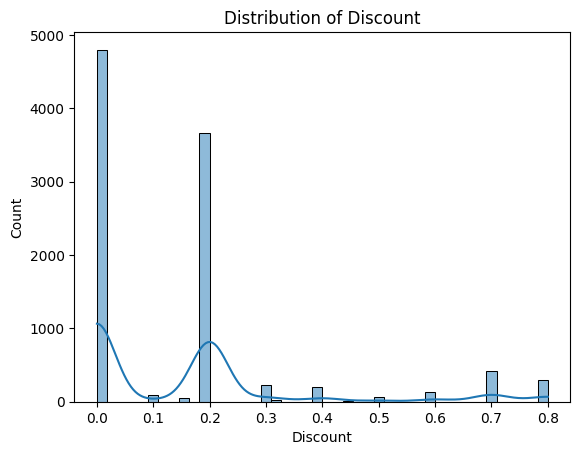

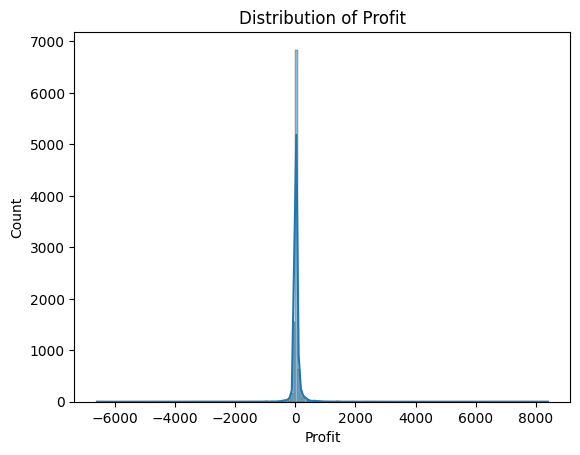

In [35]:
# Distribution of key metrics to detect skewness or outliers
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['Sales', 'Quantity', 'Discount', 'Profit']
for col in numeric_cols:
    sns.histplot(superstore[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


### Profit Distribution Analysis

The full distribution of profit reveals a sharp central peak with long tails on both sides, indicating the presence of extreme outliers. While this view is useful for identifying high-loss or high-gain transactions, it compresses the core distribution, making it difficult to interpret typical performance.

To improve readability, I zoomed in to focus on transactions within ±$1,000. This reveals that most orders yield modest profits or losses, suggesting tight margins and potential pricing inefficiencies.

**Business Implications:**
- High-loss outliers may warrant operational review or discount policy adjustments.
- The concentration near zero profit highlights the need for margin optimization.
- Sub-category and regional breakdowns can further isolate underperforming segments.

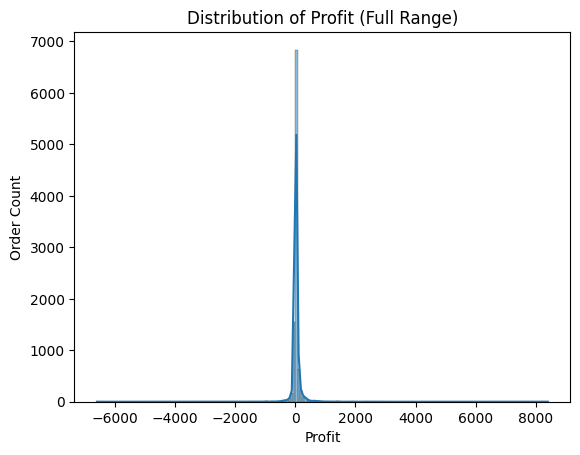

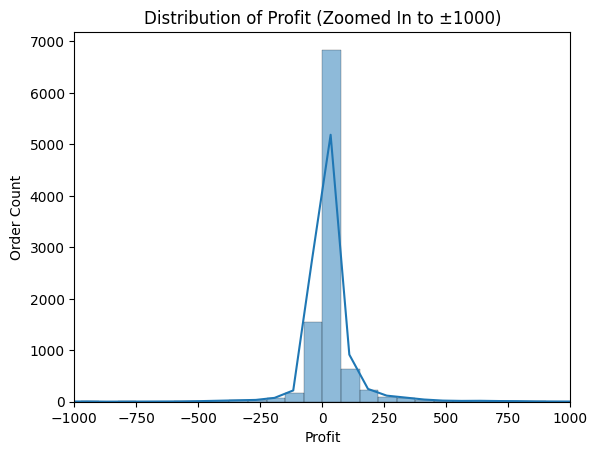

In [37]:
sns.histplot(superstore['Profit'], kde=True)
plt.title("Distribution of Profit (Full Range)")
plt.xlabel("Profit")
plt.ylabel("Order Count")
plt.show()

sns.histplot(superstore['Profit'], kde=True)
plt.xlim(-1000, 1000)
plt.title("Distribution of Profit (Zoomed In to ±1000)")
plt.xlabel("Profit")
plt.ylabel("Order Count")
plt.show()


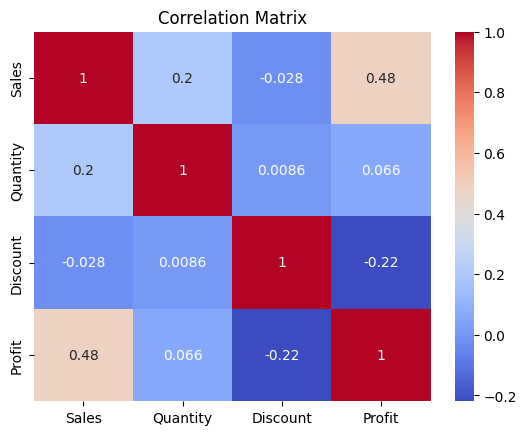

In [38]:
# Identify relationships between numeric variables
sns.heatmap(superstore[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [39]:
# Clean and Transform for Tableau
# Standardize column names to make the Tableau friendly

superstore.columns = superstore.columns.str.replace(' ', '_').str.lower()

In [40]:
# Convert date columns to datetime format
superstore['order_date'] = pd.to_datetime(superstore['order_date'])
superstore['ship_date'] = pd.to_datetime(superstore['ship_date'])


In [41]:
# Create derived fields

# Shipping delays in days
superstore['shipping_delay_days'] = (superstore['ship_date'] - superstore['order_date']).dt.days

# Profit Margins
superstore['profit_margin'] = superstore['profit'] / superstore['sales']

In [ ]:
# Handle missing or zero values
superstore.isnull().sum()       

row_id                 0
order_id               0
order_date             0
ship_date              0
ship_mode              0
customer_id            0
customer_name          0
segment                0
country                0
city                   0
state                  0
postal_code            0
region                 0
product_id             0
category               0
sub-category           0
product_name           0
sales                  0
quantity               0
discount               0
profit                 0
shipping_delay_days    0
profit_margin          0
dtype: int64

In [44]:
from scipy.stats import zscore

# Calculate Z-scores for the Profit column
superstore['profit_zscore'] = zscore(superstore['profit'])

# Flag outliers beyond ±3 standard deviations
superstore['profit_outlier'] = superstore['profit_zscore'].apply(lambda z: 'Yes' if abs(z) > 3 else 'No')

In [46]:
# Export cleaned data to GitHub repo
output_path = "../data/superstore_data/cleaned_superstore.csv"
superstore.to_csv(output_path, index=False)
print(f"Cleaned data exported to: {output_path}")

Cleaned data exported to: ../data/superstore_data/cleaned_superstore.csv
